In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [30]:
NUM_ITER = 1000
lr = 1

<h2>Define your input data and expected labels</h2>

In [31]:
# training data
x = np.array([[0,0],[1,0],[1,1],[0,1]], np.float32)
# training labels for XOR
y = np.array([0,1,0,1], np.float32)
y = np.reshape(y, [4,1])

<h2>Define placeholder and Variables</h2>

In [40]:
# define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[4,2], name='X')
Y = tf.placeholder(tf.float32,shape=[4,1], name='Y')
# define the weights and initialized with random normal distribution
W1 = tf.Variable(tf.random_normal([2,2]), tf.float32, name='W1')
W2 = tf.Variable(tf.random_normal([2,1]), tf.float32, name='W2')
# define the bias with zero initialization
b1 = tf.Variable(tf.zeros([1,2]),tf.float32, name='b1')
b2 = tf.Variable(tf.zeros([1,1]),tf.float32, name='b2')

<h2>Define the neural network</h2>

In [41]:
# define the predicted output label
X1_out = tf.sigmoid(tf.add(tf.matmul(X, W1), b1))
Y_hat = tf.add(tf.matmul(X1_out, W2), b2)

<h2>Define cost function</h2>

In [42]:
# the error between target and logit
loss = tf.losses.sigmoid_cross_entropy(Y, Y_hat)
step = tf.train.GradientDescentOptimizer(lr).minimize(loss)
# define accuracy
Y_out = tf.round(tf.sigmoid(Y_hat))
error_eval = tf.count_nonzero(Y - Y_out)

<h2>Execute training</h2>

In [43]:
# initialize tensorflow variables
init = tf.global_variables_initializer()

# start tensorflow session
with tf.Session() as sess:
    # run initialization
    sess.run(init)
    # training for number of iterations
    for i in range(NUM_ITER):
        # every iteration we run optimization on the training data X and labels Y
        sess.run(step, feed_dict={X:x, Y:y})
        
        if i % 10 == 0:
            loss_value = sess.run(loss, feed_dict = {X:x,Y:y})
            error_num = sess.run(error_eval, feed_dict = {X:x,Y:y})
            print('epoch %d: loss %f, accuracy %f' % (i, loss_value, 1 - error_num / 4.0))
    
    Y_out = sess.run(Y_out, feed_dict = {X:x, Y:y})   
    
    # after training, we acquire the weight and bias
    W1 = np.squeeze(sess.run(W1))
    W2 = np.squeeze(sess.run(W2))
    b1 = np.squeeze(sess.run(b1))
    b2 = np.squeeze(sess.run(b2))

epoch 0: loss 0.695176, accuracy 0.500000
epoch 10: loss 0.692447, accuracy 0.500000
epoch 20: loss 0.691822, accuracy 0.500000
epoch 30: loss 0.690884, accuracy 0.500000
epoch 40: loss 0.689453, accuracy 0.500000
epoch 50: loss 0.687274, accuracy 0.500000
epoch 60: loss 0.684014, accuracy 0.500000
epoch 70: loss 0.679297, accuracy 0.500000
epoch 80: loss 0.672796, accuracy 0.500000
epoch 90: loss 0.664340, accuracy 0.500000
epoch 100: loss 0.653983, accuracy 0.750000
epoch 110: loss 0.641998, accuracy 0.750000
epoch 120: loss 0.628850, accuracy 0.750000
epoch 130: loss 0.615149, accuracy 0.750000
epoch 140: loss 0.601542, accuracy 0.750000
epoch 150: loss 0.588579, accuracy 0.750000
epoch 160: loss 0.576608, accuracy 0.750000
epoch 170: loss 0.565771, accuracy 0.750000
epoch 180: loss 0.556045, accuracy 0.750000
epoch 190: loss 0.547305, accuracy 0.750000
epoch 200: loss 0.539378, accuracy 0.750000
epoch 210: loss 0.532070, accuracy 0.750000
epoch 220: loss 0.525193, accuracy 0.750000

In [44]:
print('W1 =', W1)
print('W2 =', W2)
print('b1 =', b1)
print('b2 =', b2)
print('Y_out =', Y_out)

W1 = [[ 4.664094 -6.684856]
 [ 4.662728 -6.67364 ]]
W2 = [-9.98065  -9.813463]
b1 = [-7.2285314  2.629155 ]
b2 = 4.8571153
Y_out = [[0.]
 [1.]
 [0.]
 [1.]]


<h2>Plot</h2>

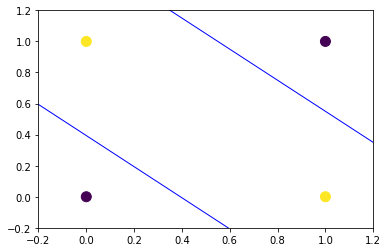

In [45]:
# plot out the decision line 
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1] + 0.2)])
plot_y1 = 1 / W1[1,0] * (- W1[0,0] * plot_x - b1[0])
plot_y2 = 1 / W1[1,1] * (- W1[0,1] * plot_x - b1[1])

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y1, color='b', linewidth=1)
plt.plot(plot_x, plot_y2, color='b', linewidth=1)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.2]);
plt.show()